# Simulate Ranked Choice Voting

### How does it work?
Voters rank up to 5 candidates 1 - 5, with 1 being the voter's first choice and 5 being the voter's last choice. Each voter can only rank one candidate at each rank. For example, Voter Smith can only rank Candidate Nguyen #1 one time. The votes are counted in rounds. In each round, if no candidate earns more than 50% of the vote, the candidate with the smallest percentage of the vote is dropped from the race.<br>
<br>
Effect on voters' vote: If a voter's number 1 candidate receives the fewest votes and is dropped from the race, the vote then goes to the number 2 ranked candidate. Basically, number 2 becomes number 1 in this round.<br>
<br>
This process is repeated until a candidate earns more than 50% of the vote in a round. If a voter's number 2 ranked candidate is dropped from the race, the vote then goes to the number 3 ranked candidate and so on. If necessary, the final round is a count between two candidates.

In [1]:
# load the necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fill in row by row

# row 1, randomly fill in with a 1
# row 2, check where the 1 is in row 1, then randomly fill in remaining 0 and one 1
# row 3, check where the 1 is in rows 1 and 2, then randomly fill in remaining 0 and one 1
# ...
# row 5, fill in the last column with a 1
#available votes and for remaining ranks
cA = [1,0,0,0,0]
cB = [1,0,0,0]
cC = [1,0,0]
cD = [1,0]
cE = [1]

### Create ONE random ballot
Rules for ballots:<br>
1. Each candidate can only have one rank<br>
2. Each rank can only have one candidate

In [9]:
# define ranks and candidates
rank_list = [i for i in np.arange(1,6,1)] # ranked 1 - 5
candidate_list = ['A', 'B', 'C', 'D', 'E']

In [10]:
# start an empty ballot with 5 rows for candidates and 5 cols for ranks
ballot = [[0,0,0,0,0] for i in range(5)]
# cast vote for candidate A
ballot[0] = random.sample(cA, 5)

# update the used_rank list
used_rank = []
# iterate through the 'rows'
for i in range(5):
    # iterate through the 'columns'
    for j in range(5):
        # find the location of used ranks
        if ballot[i][j] == 1:
            used_rank.append(j)

# get the ranks available for candidate B
avail_rank = []
while True:
    for i in range(5):
        if i not in used_rank:
            avail_rank.append(i)
    break

# get the random vote for candidate B
voteB = random.sample(cB,4)

# match up available ranks with votes
rank_dic = {}
for key in avail_rank:
    for value in voteB:
        rank_dic[key] = value
        voteB.remove(value)
        break

# assign votes to ranks for Candidate B
for i in range(5):
    if i in rank_dic.keys():
        # assign random vote to available ranks
        ballot[1][i] = rank_dic.get(i)
    else:
        # assign used ranks 0
        ballot[1][i] = 0

# update the used_rank list
used_rank = []
# iterate through the 'rows'
for i in range(5):
    # iterate through the 'columns'
    for j in range(5):
        # find the location of used ranks
        if ballot[i][j] == 1:
            used_rank.append(j)

# get the ranks available for candidate C
avail_rank = []
while True:
    for i in range(5):
        if i not in used_rank:
            avail_rank.append(i)
    break

# get the random vote for candidate C
voteC = random.sample(cC, 3)

# match up available ranks with votes
rank_dic = {}
for key in avail_rank:
    for value in voteC:
        rank_dic[key] = value
        voteC.remove(value)
        break

# assign votes to ranks for Candidate C
for i in range(5):
    if i in rank_dic.keys():
        # assign random vote to available ranks
        ballot[2][i] = rank_dic.get(i)
    else:
        # assign used ranks 0
        ballot[2][i] = 0


# update the used_rank list
used_rank = []
# iterate through the 'rows'
for i in range(5):
    # iterate through the 'columns'
    for j in range(5):
        # find the location of used ranks
        if ballot[i][j] == 1:
            used_rank.append(j)

# get the ranks available for candidate D
avail_rank = []
while True:
    for i in range(5):
        if i not in used_rank:
            avail_rank.append(i)
    break

# get the random vote for candidate D
voteD = random.sample(cD, 2)

# match up available ranks with votes
rank_dic = {}
for key in avail_rank:
    for value in voteD:
        rank_dic[key] = value
        voteD.remove(value)
        break

# assign votes to ranks for Candidate D
for i in range(5):
    if i in rank_dic.keys():
        # assign random vote to available ranks
        ballot[3][i] = rank_dic.get(i)
    else:
        # assign used ranks 0
        ballot[3][i] = 0

# update the used_rank list
used_rank = []
# iterate through the 'rows'
for i in range(5):
    # iterate through the 'columns'
    for j in range(5):
        # find the location of used ranks
        if ballot[i][j] == 1:
            used_rank.append(j)

for r in range(5):
    if r in used_rank:
        ballot[4][r] = 0
    else:
        ballot[4][r] = cE[0]


df = pd.DataFrame(ballot,
            columns = rank_list,
            index = candidate_list)

print(df.sum())
print(df.sum(axis = 1))
df

1    1
2    1
3    1
4    1
5    1
dtype: int64
A    1
B    1
C    1
D    1
E    1
dtype: int64


,1,2,3,4,5
A,0,1,0,0,0
B,0,0,0,1,0
C,0,0,1,0,0
D,1,0,0,0,0
E,0,0,0,0,1


In [11]:
# generate n random ballots and store in a concatenated dataframe
def random_ballots(n):
    ballot_df_list = []
    empty_df = pd.DataFrame([[0,0,0,0,0] for i in range(5)],
                           columns = rank_list,
                           index = candidate_list)
    for k in range(n):
        # start an empty ballot with 5 rows for candidates and 5 cols for ranks
        ballot = [[0,0,0,0,0] for i in range(5)]
        # cast vote for candidate A
        ballot[0] = random.sample(cA, 5)

        # update the used_rank list
        used_rank = []
        # iterate through the 'rows'
        for i in range(5):
            # iterate through the 'columns'
            for j in range(5):
                # find the location of used ranks
                if ballot[i][j] == 1:
                    used_rank.append(j)

        # get the ranks available for candidate B
        avail_rank = []
        while True:
            for i in range(5):
                if i not in used_rank:
                    avail_rank.append(i)
            break

        # get the random vote for candidate B
        voteB = random.sample(cB,4)

        # match up available ranks with votes
        rank_dic = {}
        for key in avail_rank:
            for value in voteB:
                rank_dic[key] = value
                voteB.remove(value)
                break

        # assign votes to ranks for Candidate B
        for i in range(5):
            if i in rank_dic.keys():
                # assign random vote to available ranks
                ballot[1][i] = rank_dic.get(i)
            else:
                # assign used ranks 0
                ballot[1][i] = 0

        # update the used_rank list
        used_rank = []
        # iterate through the 'rows'
        for i in range(5):
            # iterate through the 'columns'
            for j in range(5):
                # find the location of used ranks
                if ballot[i][j] == 1:
                    used_rank.append(j)

        # get the ranks available for candidate C
        avail_rank = []
        while True:
            for i in range(5):
                if i not in used_rank:
                    avail_rank.append(i)
            break

        # get the random vote for candidate C
        voteC = random.sample(cC, 3)

        # match up available ranks with votes
        rank_dic = {}
        for key in avail_rank:
            for value in voteC:
                rank_dic[key] = value
                voteC.remove(value)
                break

        # assign votes to ranks for Candidate C
        for i in range(5):
            if i in rank_dic.keys():
                # assign random vote to available ranks
                ballot[2][i] = rank_dic.get(i)
            else:
                # assign used ranks 0
                ballot[2][i] = 0


        # update the used_rank list
        used_rank = []
        # iterate through the 'rows'
        for i in range(5):
            # iterate through the 'columns'
            for j in range(5):
                # find the location of used ranks
                if ballot[i][j] == 1:
                    used_rank.append(j)

        # get the ranks available for candidate D
        avail_rank = []
        while True:
            for i in range(5):
                if i not in used_rank:
                    avail_rank.append(i)
            break

        # get the random vote for candidate D
        voteD = random.sample(cD, 2)

        # match up available ranks with votes
        rank_dic = {}
        for key in avail_rank:
            for value in voteD:
                rank_dic[key] = value
                voteD.remove(value)
                break

        # assign votes to ranks for Candidate D
        for i in range(5):
            if i in rank_dic.keys():
                # assign random vote to available ranks
                ballot[3][i] = rank_dic.get(i)
            else:
                # assign used ranks 0
                ballot[3][i] = 0

        # update the used_rank list
        used_rank = []
        # iterate through the 'rows'
        for i in range(5):
            # iterate through the 'columns'
            for j in range(5):
                # find the location of used ranks
                if ballot[i][j] == 1:
                    used_rank.append(j)

        for r in range(5):
            if r in used_rank:
                ballot[4][r] = 0
            else:
                ballot[4][r] = cE[0]
        ballot_df = pd.DataFrame(ballot, columns = rank_list, index = candidate_list)
        ballot_df.insert(loc = 0, column = 'Candidate', value = candidate_list)
        ballot_df_list.append(ballot_df)
        ballot_df_total = pd.concat(ballot_df_list)
        #ballot_df_total = pd.merge(empty_df,ballot_df, on = empty_df.index)
    return ballot_df_total, ballot_df_list

In [12]:
# define the number of ballots
n = 11
# the ballot will have candidates along the rows and ranks along the columns
# candidate x row
# candidate_list = ['A', 'B', 'C', 'D', 'E']
# rank_list = [1, 2, 3, 4, 5]
all_ballots, all_ballots_list = random_ballots(n)

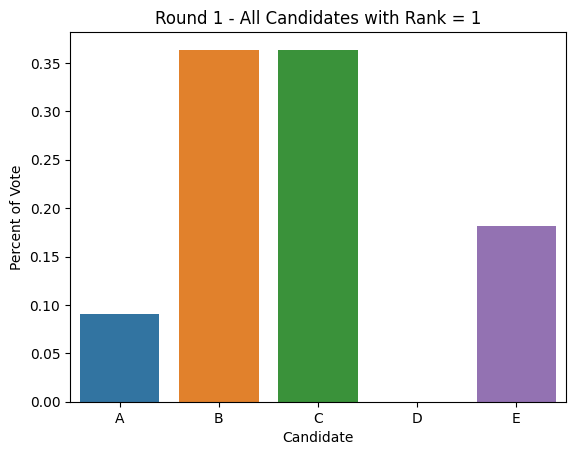

In [13]:
# how to tally up the votes

# group up by candidate and rank - then add all these up
vote_tally = all_ballots.groupby(['Candidate']).sum()
vote_tally.reset_index(inplace = True) # reset the index to clear the double index
# get the frequency since ranked choice voting is based on getting
# more than 50% of the vote
vote_tally_freq = vote_tally._get_numeric_data()/n
vote_tally_freq['Candidate'] = candidate_list

# bar plot of the results
sns.barplot(x = 'Candidate', y = 1, data = vote_tally_freq)
plt.ylabel('Percent of Vote')
plt.title('Round 1 - All Candidates with Rank = 1')
plt.show()

In [14]:
# Do we need to keep going?
winner_list = vote_tally_freq[1][vote_tally_freq[1]>0.5]

if len(winner_list) > 0:
    print('STOP! WE HAVE A WINNER!!')
    winner = vote_tally_freq.loc[vote_tally_freq[1] == max(vote_tally_freq[1]),'Candidate']
    winner_name = winner.values[0]
    winner_ix = winner.index[0]
    print('CONGRATULATIONS! The winner is Candidate', winner_name)
else:
    print('Looks like we need to keep going to find a winner...')

Looks like we need to keep going to find a winner...


In [15]:
# need to drop the candidate with the least percentage of the vote

# get the candidate with the lowest percentage
c2d = vote_tally_freq.loc[vote_tally_freq[1] == min(vote_tally_freq[1]),'Candidate']
# store candidate name
c2d_name = c2d.values[0]
# store candidate index
c2d_ix = c2d.index[0]
candidate_list.remove(c2d_name)
print('The Candidate to drop is', c2d_name, 'earning', round(min(vote_tally_freq[1]*100),2), '% of the vote.')


The Candidate to drop is D earning 0.0 % of the vote.


In [16]:
############## SEE THE BALLOTS THAT RANKED DROPPED CANDIDATE 1 ##############

# find the whole ballot (df) with dropped candidate rank 1
drop_list = []
for i,df in enumerate(all_ballots_list):
    if df[1][c2d_ix] == 1:
        # store it in a list
        drop_list.append((i,df))
        print('dataframe',i,'\n',df)

In [17]:
# find the whole ballot (df) with candidate to drop rank 1
drop_list = []
for i,df in enumerate(all_ballots_list):
    if df[1][c2d_ix] == 1:
        # store it in a list
        drop_list.append((i, df))
    #print('dataframe',i,'\n',df)
# go through the drop list and change the ranks
for tup in drop_list:
    # drop rank 1
    new_df = tup[1].drop(1, axis = 1)
    # shift ranks left by renaming columns
    new_df.columns = ['Candidate', 1, 2, 3, 4]
    # add in the rank 5 column of 0s for size agreement
    new_df[5] = [0,0,0,0,0]
# replace the df in the all_ballots_list with the new df
for tup in drop_list:
        # store the index
        m = tup[0]
        all_ballots_list[m] = new_df


In [18]:
# find the whole ballot (df) with candidate to drop rank 1
# this gets the column index (rank) of the dropped candidate for each ballot
df_col_list = []
for i,df in enumerate(all_ballots_list):
    for col in df.columns:
        if df[col][c2d_ix] == 1:
            print('dfindex=', i, 'column index=',col)
            df_col_list.append((i, col))
#df_col_list

dfindex= 0 column index= 4
dfindex= 1 column index= 4
dfindex= 2 column index= 2
dfindex= 3 column index= 2
dfindex= 4 column index= 3
dfindex= 5 column index= 4
dfindex= 6 column index= 2
dfindex= 7 column index= 2
dfindex= 8 column index= 5
dfindex= 9 column index= 5
dfindex= 10 column index= 2


In [19]:
# drop the candidate
new_list = []
for df in all_ballots_list:
    df = df.drop(c2d_name, axis = 0)
    new_list.append(df)
#new_list

In [20]:
# want to shift columns to the right of the dropped candidate ranking
# one spot left - increase rankings by 1
all_ballots_list2 = []
for tup in df_col_list:
    df = new_list[tup[0]]
    for i in range(tup[1], len(df.columns)-1):
        df.iloc[:,i] = df.iloc[:,i+1]
        df[5] = [0,0,0,0]
        all_ballots_list2.append(df)
#abl

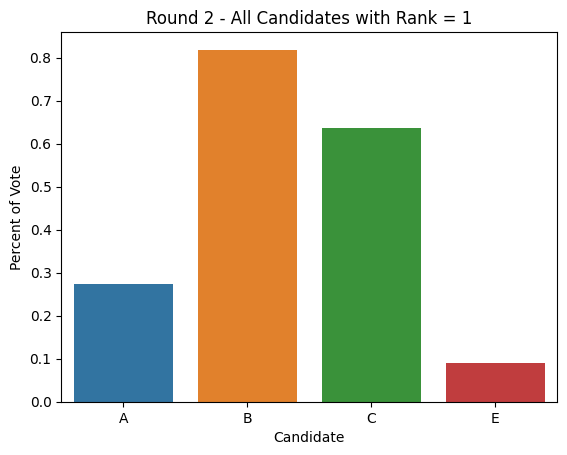

In [22]:
# retally
# how to tally up the votes
all_ballots2 = pd.concat(all_ballots_list2)

# group up by candidate and rank - then add all these up
vote2_tally = all_ballots2.groupby(['Candidate']).sum()
vote2_tally.reset_index(inplace = True) # reset the index to clear the double index
# get the frequency since ranked choice voting is based on getting
# more than 50% of the vote
vote2_tally_freq = vote2_tally._get_numeric_data()/n
vote2_tally_freq['Candidate'] = candidate_list

# bar plot of the results
sns.barplot(x = 'Candidate', y = 1, data = vote2_tally_freq)
plt.ylabel('Percent of Vote')
plt.title('Round 2 - All Candidates with Rank = 1')
plt.show()

In [23]:
# Do we need to keep going?
winner_list = vote2_tally_freq[1][vote2_tally_freq[1]>0.5]

if len(winner_list) > 0:
    print('STOP! WE HAVE A WINNER!!')
    winner = vote2_tally_freq.loc[vote2_tally_freq[1] == max(vote2_tally_freq[1]),'Candidate']
    winner_name = winner.values[0]
    winner_ix = winner.index[0]
    print('CONGRATULATIONS! The winner is Candidate', winner_name)
else:
    print('Looks like we need to keep going to find a winner...')

STOP! WE HAVE A WINNER!!
CONGRATULATIONS! The winner is Candidate B


In [24]:
# need to drop the candidate with the least percentage of the vote

# get the candidate with the lowest percentage
c2d = vote2_tally_freq.loc[vote2_tally_freq[1] == min(vote2_tally_freq[1]),'Candidate']
# store candidate name
c2d_name = c2d.values[0]
# store candidate index
c2d_ix = c2d.index[0]
candidate_list.remove(c2d_name)
print('The Candidate to drop is', c2d_name, 'earning', round(min(vote2_tally_freq[1]*100),2), '% of the vote.')

The Candidate to drop is E earning 9.09 % of the vote.


In [25]:
# find the whole ballot (df) with candidate to drop ranked 1
drop_list = []
for i,df in enumerate(all_ballots_list2):
    if df[1][c2d_ix] == 1:
        # store it in a list
        drop_list.append((i, df))
    #print('dataframe',i,'\n',df)

# go through the drop list and change the ranks
for tup in drop_list:
    # drop rank 1
    new_df = tup[1].drop(1, axis = 1)
    # shift ranks left by renaming columns
    new_df.columns = ['Candidate', 1, 2, 3, 4]
    # add in the rank 5 column of 0s for size agreement
    new_df[5] = [0,0,0,0]
# replace the df in the all_ballots_list with the new df
for tup in drop_list:
        # store the index
        m = tup[0]
        all_ballots_list2[m] = new_df

In [26]:
# drop the candidate
new_list = []
for df in all_ballots_list2:
    df = df.drop(c2d_name, axis = 0)
    new_list.append(df)
#new_list

In [27]:
# want to shift columns to the right of the dropped candidate ranking
# one spot left - increase rankings by 1
all_ballot_list3 = []
for tup in df_col_list:
    df = new_list[tup[0]]
    for i in range(tup[1], len(df.columns)-1):
        df.iloc[:,i] = df.iloc[:,i+1]
        df[5] = [0,0,0]
        all_ballot_list3.append(df)
#abl

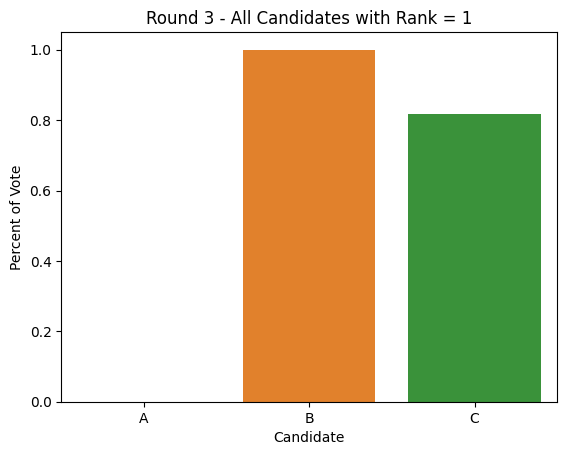

In [28]:
# retally
# how to tally up the votes
all_ballots3 = pd.concat(all_ballot_list3)

# group up by candidate and rank - then add all these up
vote3_tally = all_ballots3.groupby(['Candidate']).sum()
vote3_tally.reset_index(inplace = True) # reset the index to clear the double index
# get the frequency since ranked choice voting is based on getting
# more than 50% of the vote
vote3_tally_freq = vote3_tally._get_numeric_data()/n
vote3_tally_freq['Candidate'] = candidate_list

# bar plot of the results
sns.barplot(x = 'Candidate', y = 1, data = vote3_tally_freq)
plt.ylabel('Percent of Vote')
plt.title('Round 3 - All Candidates with Rank = 1')
plt.show()

In [29]:
# Do we need to keep going?
winner_list = vote3_tally_freq[1][vote3_tally_freq[1]>0.5]

if len(winner_list) > 0:
    print('STOP! WE HAVE A WINNER!!')
    winner = vote3_tally_freq.loc[vote3_tally_freq[1] == max(vote3_tally_freq[1]),'Candidate']
    winner_name = winner.values[0]
    winner_ix = winner.index[0]
    print('CONGRATULATIONS! The winner is Candidate', winner_name)
else:
    print('Looks like we need to keep going to find a winner...')

STOP! WE HAVE A WINNER!!
CONGRATULATIONS! The winner is Candidate B


In [ ]:
# need to drop the candidate with the least percentage of the vote

# get the candidate with the lowest percentage
c2d = vote3_tally_freq.loc[vote3_tally_freq[1] == min(vote3_tally_freq[1]),'Candidate']
# store candidate name
c2d_name = c2d.values[0]
# store candidate index
c2d_ix = c2d.index[0]
candidate_list.remove(c2d_name)
print('The Candidate to drop is', c2d_name, 'earning', round(min(vote3_tally_freq[1]*100),2), '% of the vote.')

The Candidate to drop is D earning 27.27 % of the vote.


In [ ]:
# find the whole ballot (df) with candidate to drop ranked 1
drop_list = []
for i,df in enumerate(all_ballots_list2):
    if df[1][c2d_ix] == 1:
        # store it in a list
        drop_list.append((i, df))
    #print('dataframe',i,'\n',df)

# go through the drop list and change the ranks
for tup in drop_list:
    # drop rank 1
    new_df = tup[1].drop(1, axis = 1)
    # shift ranks left by renaming columns
    new_df.columns = ['Candidate', 1, 2, 3, 4]
    # add in the rank 5 column of 0s for size agreement
    new_df[5] = [0,0,0,0]
# replace the df in the all_ballots_list with the new df
for tup in drop_list:
        # store the index
        m = tup[0]
        all_ballots_list3[m] = new_df

In [ ]:
# drop the candidate
new_list = []
for df in all_ballot_list3:
    df = df.drop(c2d_name, axis = 0)
    new_list.append(df)
#new_list

In [ ]:
# want to shift columns to the right of the dropped candidate ranking
# one spot left - increase rankings by 1
all_ballot_list4 = []
for tup in df_col_list:
    df = new_list[tup[0]]
    for i in range(tup[1], len(df.columns)-1):
        df.iloc[:,i] = df.iloc[:,i+1]
        df[5] = [0,0]
        all_ballot_list4.append(df)
#abl

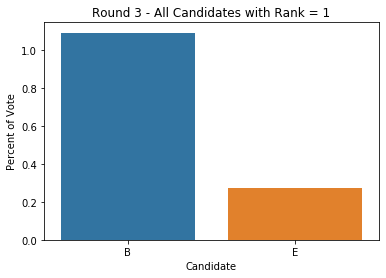

In [ ]:
# retally
# how to tally up the votes
all_ballots4 = pd.concat(all_ballot_list4)

# group up by candidate and rank - then add all these up
vote4_tally = all_ballots4.groupby(['Candidate']).sum()
vote4_tally.reset_index(inplace = True) # reset the index to clear the double index
# get the frequency since ranked choice voting is based on getting
# more than 50% of the vote
vote4_tally_freq = vote4_tally._get_numeric_data()/n
vote4_tally_freq['Candidate'] = candidate_list

# bar plot of the results
sns.barplot(x = 'Candidate', y = 1, data = vote4_tally_freq)
plt.ylabel('Percent of Vote')
plt.title('Round 4 - All Candidates with Rank = 1')
plt.show()

In [ ]:
oi = pd.concat([vote_tally[1],vote2_tally[1], vote3_tally[1],vote4_tally[1]], axis = 1)
oi

,1,1,1,1
0,1,5.0,5.0,12.0
1,3,1.0,3.0,3.0
2,2,4.0,10.0,NaN
3,3,5.0,NaN,NaN
4,2,NaN,NaN,NaN


In [ ]:
# find the whole ballot (df) with candidate D rank 1
drop_list = []
for i,df in enumerate(all_ballots_list):
    if df[1][3] == 1:
        # store it in a list
        drop_list.append((i,df))
    #print('dataframe',i,'\n',df)
# go through the drop list and change the ranks
for tup in drop_list:
    new_df = tup[1].drop(1, axis = 1)
    new_df.columns = ['Candidate', 1, 2, 3, 4]
    new_df[5] = [0,0,0,0,0]
# replace the df in the all_ballots_list with the new df
#for tup in drop_list:
        # stor the index
 #       m = tup[0]
  #      all_ballots_list[m] = new_df
new_df

,Candidate,1,2,3,4,5
A,A,0,0,1,0,0
B,B,0,0,0,1,0
C,C,0,1,0,0,0
D,D,0,0,0,0,0
E,E,1,0,0,0,0


In [ ]:
# in all ballots, what is the rank for the dropped candidate
# shift all the columns to the right of that rank left
# drop the row

df = pd.DataFrame(np.random.randint(0,100,size=(6, 6)),
                  columns=list('abcdef'),
                 index = list('ABCDEF'))
df

,a,b,c,d,e,f
A,33,11,97,3,73,89
B,34,39,64,96,87,12
C,71,97,23,80,44,14
D,69,81,70,70,9,69
E,14,63,30,21,4,64
F,80,56,42,89,35,11


In [ ]:
for i in range(2,len(df.columns)-1):
        df.iloc[:,i] = df.iloc[:,i+1]
df['f'] = [0,0,0,0,0,0]

#    df.iloc[:,1:].shift(-1, axis = 1)
#    abl.append(new_list[tup[0]].iloc[:,tup[1]:].shift(-1, axis = 1, fill_value = 0))
df

,a,b,c,d,e,f
A,33,11,3,73,89,0
B,34,39,96,87,12,0
C,71,97,80,44,14,0
D,69,81,70,9,69,0
E,14,63,21,4,64,0
F,80,56,89,35,11,0


In [ ]:
vote_tally[1]

0    1
1    3
2    2
3    3
4    2
Name: 1, dtype: int64

In [ ]:
oi.remove('a')

In [ ]:
oi

['b', 'c', 'd', 'e', 'f']